# Credit Decisioning/ Risk Assessment

### Roadmap:
- Understanding the Problem Statement
- Data Collection
- Exploratory Data Analysis
- Data Pre-processing
- Model Training
- Model Evaluation
- Model Selection
- Hyperparamter Tuning

## 1. Problem Statement
- A Fintech company wants to leverage AI to analyze wide range of data points beyond credit bureau information. This includes factors such as income, employment history, debt-to-income ratio, loan purpose data to assess the creditworthiness of borrowers more comprehensively. The AI-powered credit scoring system should enable real-time decisioning, allowing loan applicants to receive instant approvals or rejections based on their risk profile. The streamlined process should enhance the customer experience and reduce the time and effort required for loan underwriting.

## 2. Data Collection
- Dataset Source: Kaggle
- The dataset contains *151* features and *2.2M* records.

## 2.1: Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing the CSV Data as Pandas Dataframe:

In [3]:
df = pd.read_csv(r'F:\netsol_project\task_1\raw\reducedd\reduced_data.csv')

#### Top 5 records

In [4]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,9785323,NaN,28000.0,28000.0,28000.0,36 months,6.62,859.71,A,A2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,78558461,NaN,10650.0,10650.0,10650.0,36 months,25.11,424.07,F,F1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,110757806,NaN,18000.0,18000.0,18000.0,36 months,10.91,588.54,B,B4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,96668860,NaN,3975.0,3975.0,3975.0,36 months,17.99,143.69,D,D2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,118207599,NaN,4800.0,4800.0,4800.0,36 months,16.02,168.81,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


#### Shape of Dataset:

In [5]:
df.shape

(300000, 151)

### Dataset Information:
Interpretations of Features
1.	id: Unique identifier for each loan.
2.	member_id: Identifier for the borrower (NaN values might indicate missing data).
3.	loan_amnt: The amount of money requested by the borrower.
4.	funded_amnt: The amount of money funded by investors.
5.	funded_amnt_inv: The amount of money funded by investors (can be same as funded_amnt).
6.	term: The length of the loan term (e.g., 36 months, 60 months).
7.	int_rate: The interest rate on the loan.
8.	installment: The monthly payment owed by the borrower.
9.	grade: Loan grade assigned by the lending platform.
10.	sub_grade: Sub-grade assigned by the lending platform.
11.	emp_title: The job title of the borrower.
12.	emp_length: The length of employment in years.
13.	home_ownership: The ownership status of the borrower's residence (e.g., Rent, Own, Mortgage).
14.	annual_inc: The annual income of the borrower.
15.	verification_status: Status of income verification (e.g., Verified, Not Verified).
16.	issue_d: The month when the loan was funded.
17.	loan_status: Current status of the loan (e.g., Fully Paid, Charged Off, Current).
18.	pymnt_plan: Whether the borrower is on a payment plan (yes/no).
19.	url: URL for the listing page.
20.	desc: Description provided by the borrower.
21.	purpose: The purpose of the loan (e.g., debt consolidation, credit card, home improvement).
22.	title: The title of the loan provided by the borrower.
23.	zip_code: The first 3 digits of the borrower's ZIP code.
24.	addr_state: The state provided by the borrower.
25.	dti: Debt-to-income ratio.
26.	delinq_2yrs: The number of delinquencies in the past 2 years.
27.	earliest_cr_line: The date when the earliest credit line was opened.
28.	fico_range_low: The lower bound of the borrower's FICO score.
29.	fico_range_high: The upper bound of the borrower's FICO score.
30.	inq_last_6mths: The number of inquiries in the past 6 months.
31.	mths_since_last_delinq: Months since the last delinquency.
32.	mths_since_last_record: Months since the last public record.
33.	open_acc: The number of open credit lines.
34.	pub_rec: The number of derogatory public records.
35.	revol_bal: The total credit revolving balance.
36.	revol_util: Revolving line utilization rate.
37.	total_acc: The total number of credit lines.
38.	initial_list_status: The initial listing status of the loan.
39.	out_prncp: The remaining outstanding principal for the total amount funded.
40.	out_prncp_inv: The remaining outstanding principal for the portion of the loan funded by investors.
41.	total_pymnt: Payments received to date for the total amount funded.
42.	total_pymnt_inv: Payments received to date for the portion of the loan funded by investors.
43.	total_rec_prncp: Principal received to date.
44.	total_rec_int: Interest received to date.
45.	total_rec_late_fee: Late fees received to date.
46.	recoveries: Post charge-off gross recovery.
47.	collection_recovery_fee: Fees paid for recovery.
48.	last_pymnt_d: The date of the last payment.
49.	last_pymnt_amnt: The amount of the last payment.
50.	next_pymnt_d: The date of the next payment.
51.	last_credit_pull_d: The most recent date when the borrower's credit profile was pulled.
52.	last_fico_range_high: The upper bound of the most recent FICO score.
53.	last_fico_range_low: The lower bound of the most recent FICO score.
54.	collections_12_mths_ex_med: Number of collections in the past 12 months excluding medical collections.
55.	mths_since_last_major_derog: Months since the most recent major derogatory event.
56.	policy_code: Publicly available policy code.
57.	application_type: Indicates whether the loan is an individual or joint application.
58.	annual_inc_joint: The joint annual income.
59.	dti_joint: Debt-to-income ratio for joint applications.
60.	verification_status_joint: Income verification status for joint applications.
61.	acc_now_delinq: The number of accounts currently delinquent.
62.	tot_coll_amt: Total collection amounts ever owed.
63.	tot_cur_bal: Total current balance of all accounts.
64.	open_acc_6m: Number of open accounts in the past 6 months.
65.	open_act_il: Number of currently active installment accounts.
66.	open_il_12m: Number of installment accounts opened in past 12 months.
67.	open_il_24m: Number of installment accounts opened in past 24 months.
68.	mths_since_rcnt_il: Months since most recent installment accounts opened.
69.	total_bal_il: Total current balance of all installment accounts.
70.	il_util: Ratio of current balance to credit limit on all installment accounts.
71.	open_rv_12m: Number of revolving accounts opened in past 12 months.
72.	open_rv_24m: Number of revolving accounts opened in past 24 months.
73.	max_bal_bc: Maximum current balance on all bank cards.
74.	all_util: Balance to credit limit on all accounts.
75.	total_rev_hi_lim: Total revolving high credit/credit limit.
76.	inq_fi: Number of personal finance inquiries.
77.	total_cu_tl: Number of credit union trades.
78.	inq_last_12m: Number of credit inquiries in the last 12 months.
79.	acc_open_past_24mths: Number of accounts opened in the past 24 months.
80.	avg_cur_bal: Average current balance of all accounts.
81.	bc_open_to_buy: Total open to buy on revolving bank cards.
82.	bc_util: Bank card utilization rate.
83.	chargeoff_within_12_mths: Number of charge-offs within 12 months.
84.	delinq_amnt: The amount owed on delinquent accounts.
85.	mo_sin_old_il_acct: Months since the oldest installment account was opened.
86.	mo_sin_old_rev_tl_op: Months since the oldest revolving account was opened.
87.	mo_sin_rcnt_rev_tl_op: Months since the most recent revolving account was opened.
88.	mo_sin_rcnt_tl: Months since the most recent account was opened.
89.	mort_acc: Number of mortgage accounts.
90.	mths_since_recent_bc: Months since the most recent bank card account opened.
91.	mths_since_recent_bc_dlq: Months since the most recent bank card delinquency.
92.	mths_since_recent_inq: Months since the most recent inquiry.
93.	mths_since_recent_revol_delinq: Months since the most recent revolving account delinquency.
94.	num_accts_ever_120_pd: Number of accounts ever 120 days past due.
95.	num_actv_bc_tl: Number of currently active bankcard accounts.
96.	num_actv_rev_tl: Number of currently active revolving trades.
97.	num_bc_sats: Number of satisfactory bankcard accounts.
98.	num_bc_tl: Number of bankcard accounts.
99.	num_il_tl: Number of installment accounts.
100.	num_op_rev_tl: Number of open revolving accounts.
101.	num_rev_accts: Number of revolving accounts.
102.	num_rev_tl_bal_gt_0: Number of revolving trades with balance >0.
103.	num_sats: Number of satisfactory accounts.
104.	num_tl_120dpd_2m: Number of trades 120+ days past due in the past 2 months.
105.	num_tl_30dpd: Number of trades currently 30 days past due.
106.	num_tl_90g_dpd_24m: Number of trades 90+ days past due in the past 24 months.
107.	num_tl_op_past_12m: Number of trades opened in past 12 months.
108.	pct_tl_nvr_dlq: Percent of trades never delinquent.
109.	percent_bc_gt_75: Percent of bankcards >75% of limit.
110.	pub_rec_bankruptcies: Number of public record bankruptcies.
111.	tax_liens: Number of tax
112.	tot_hi_cred_lim: Total high credit/credit limit.
113.	total_bal_ex_mort: Total current balance excluding mortgage accounts.
114.	total_bc_limit: Total credit limit for all bankcard accounts.
115.	total_il_high_credit_limit: Total high credit/credit limit for all installment accounts.
116.	revol_bal_joint: Revolving credit balance for joint applications.
117.	sec_app_fico_range_low: Lower bound of the secondary applicant's FICO score range.
118.	sec_app_fico_range_high: Upper bound of the secondary applicant's FICO score range.
119.	sec_app_earliest_cr_line: Date of the earliest credit line opened by the secondary applicant.
120.	sec_app_inq_last_6mths: Number of inquiries in the past 6 months for the secondary applicant.
121.	sec_app_mort_acc: Number of mortgage accounts held by the secondary applicant.
122.	sec_app_open_acc: Number of open accounts held by the secondary applicant.
123.	sec_app_revol_util: Revolving credit utilization rate for the secondary applicant.
124.	sec_app_open_act_il: Number of currently active installment accounts for the secondary applicant.
125.	sec_app_num_rev_accts: Number of revolving accounts held by the secondary applicant.
126.	sec_app_chargeoff_within_12_mths: Number of charge-offs within 12 months for the secondary applicant.
127.	sec_app_collections_12_mths_ex_med: Number of collections in the past 12 months excluding medical collections for the secondary applicant.
128.	sec_app_mths_since_last_major_derog: Months since the most recent major derogatory event for the secondary applicant.
129.	hardship_flag: Indicates if the borrower is under hardship (yes/no).
130.	hardship_type: Type of hardship (e.g., Disaster, Unemployment).
131.	hardship_reason: Reason for hardship.
132.	hardship_status: Status of the hardship plan (e.g., Active, Completed).
133.	deferral_term: The number of months the payment is deferred due to hardship.
134.	hardship_amount: The amount of payment deferred.
135.	hardship_start_date: The start date of the hardship plan.
136.	hardship_end_date: The end date of the hardship plan.
137.	payment_plan_start_date: The start date of the payment plan.
138.	hardship_length: The length of the hardship plan.
139.	hardship_dpd: Number of days past due since hardship plan started.
140.	hardship_loan_status: Loan status during the hardship plan.
141.	orig_projected_additional_accrued_interest: The original projected additional accrued interest.
142.	hardship_payoff_balance_amount: The payoff balance amount during the hardship.
143.	hardship_last_payment_amount: The last payment amount during the hardship.
144.	disbursement_method: Method of loan disbursement (e.g., Cash, Direct Pay).
145.	debt_settlement_flag: Indicates if the loan is under debt settlement (yes/no).
146.	debt_settlement_flag_date: The date when the loan was flagged for debt settlement.
147.	settlement_status: Status of the settlement (e.g., Complete, Pending).
148.	settlement_date: The date when the settlement was completed.
149.	settlement_amount: The amount settled.
150.	settlement_percentage: The percentage of the original loan amount that was settled.
151.	settlement_term: The terms of the settlement.
152.	loan_condition_num: Numeric representation of loan condition.
153.	loan_condition: Condition of the loan (e.g., Good, Bad).
154.	emp_length_num: Numeric representation of employment length.
155.	region: Geographical region of the borrower.


### 3. Data Checks to perform:
- Checking Missing Values
- Checking Duplicates
- Check Datatypes
- Check the number of unique values in each column
- Check Statistics of the dataset
- Check various categories present in the different categorical features. 

#### 3.1: Check Missing Values:

In [7]:
df.isna().sum()

id                            0
member_id                300000
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
                          ...  
settlement_status        295454
settlement_date          295454
settlement_amount        295454
settlement_percentage    295454
settlement_term          295454
Length: 151, dtype: int64

#### 3.1.1: Check Missing Values Percentage:

In [8]:
print(f'Missing Values in Percentage is: ')
for column in df.columns:
    percentage_missing = np.mean(df[column].isna())
    print(f'{column}:{percentage_missing*100:.2f}%')

Missing Values in Percentage is: 
id:0.00%
member_id:100.00%
loan_amnt:0.00%
funded_amnt:0.00%
funded_amnt_inv:0.00%
term:0.00%
int_rate:0.00%
installment:0.00%
grade:0.00%
sub_grade:0.00%
emp_title:7.38%
emp_length:6.49%
home_ownership:0.00%
annual_inc:0.00%
verification_status:0.00%
issue_d:0.00%
loan_status:0.00%
pymnt_plan:0.00%
url:0.00%
desc:94.42%
purpose:0.00%
title:1.03%
zip_code:0.00%
addr_state:0.00%
dti:0.08%
delinq_2yrs:0.00%
earliest_cr_line:0.00%
fico_range_low:0.00%
fico_range_high:0.00%
inq_last_6mths:0.00%
mths_since_last_delinq:51.23%
mths_since_last_record:84.24%
open_acc:0.00%
pub_rec:0.00%
revol_bal:0.00%
revol_util:0.09%
total_acc:0.00%
initial_list_status:0.00%
out_prncp:0.00%
out_prncp_inv:0.00%
total_pymnt:0.00%
total_pymnt_inv:0.00%
total_rec_prncp:0.00%
total_rec_int:0.00%
total_rec_late_fee:0.00%
recoveries:0.00%
collection_recovery_fee:0.00%
last_pymnt_d:0.11%
last_pymnt_amnt:0.00%
next_pymnt_d:59.56%
last_credit_pull_d:0.00%
last_fico_range_high:0.00%
las

#### Observation:
- There are missing values present in numerous features.
- Moreover, several columns have high percentage of missing values.

#### 3.2: Check Duplicates:

In [9]:
df.duplicated().sum()

0

#### Observation: 
- There are no duplicated values present in the dataset.

#### 3.3: Check Datatypes:

In [10]:
df.dtypes

id                         int64
member_id                float64
loan_amnt                float64
funded_amnt              float64
funded_amnt_inv          float64
                          ...   
settlement_status         object
settlement_date           object
settlement_amount        float64
settlement_percentage    float64
settlement_term          float64
Length: 151, dtype: object

#### 3.4: Check Unique Values in each Feature:

In [11]:
df.nunique()

id                       300000
member_id                     0
loan_amnt                  1526
funded_amnt                1526
funded_amnt_inv            2687
                          ...  
settlement_status             3
settlement_date              69
settlement_amount          4101
settlement_percentage       478
settlement_term              29
Length: 151, dtype: int64

#### 3.5: Check Columns:

In [12]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'hardship_payoff_balance_amount', 'hardship_last_payment_amount',
       'disbursement_method', 'debt_settlement_flag',
       'debt_settlement_flag_date', 'settlement_status', 'settlement_date',
       'settlement_amount', 'settlement_percentage', 'settlement_term'],
      dtype='object', length=151)

#### 3.6: General Information:

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Columns: 151 entries, id to settlement_term
dtypes: float64(113), int64(1), object(37)
memory usage: 345.6+ MB


#### 3.7: Check Statistical Information:

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,300000.0,8.028026e+07,4.501468e+07,57245.00,4.481565e+07,84466857.50,1.223695e+08,1.456452e+08
member_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amnt,300000.0,1.504677e+04,9.172965e+03,500.00,8.000000e+03,13000.00,2.000000e+04,4.000000e+04
funded_amnt,300000.0,1.504207e+04,9.171312e+03,500.00,8.000000e+03,13000.00,2.000000e+04,4.000000e+04
funded_amnt_inv,300000.0,1.502381e+04,9.174831e+03,0.00,8.000000e+03,12975.00,2.000000e+04,4.000000e+04
...,...,...,...,...,...,...,...,...
hardship_payoff_balance_amount,1428.0,1.159325e+04,7.576927e+03,340.31,5.470515e+03,10016.81,1.632156e+04,3.807956e+04
hardship_last_payment_amount,1428.0,2.005986e+02,1.964637e+02,0.01,4.991250e+01,142.90,2.917725e+02,1.291210e+03
settlement_amount,4546.0,5.020059e+03,3.738308e+03,135.30,2.215012e+03,4091.80,6.861515e+03,2.785000e+04
settlement_percentage,4546.0,4.779324e+01,6.726364e+00,20.00,4.500000e+01,45.00,5.000000e+01,9.425000e+01


#### 3.8: Check Various Categories present in Categorical Features:

In [17]:
cat_cols = df.select_dtypes(include=['object'])
cat_cols

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,...,hardship_status,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_loan_status,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date
0,36 months,A,A2,regional manager,10+ years,MORTGAGE,Verified,Dec-2013,Fully Paid,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
1,36 months,F,F1,TRUCK DRIVER,10+ years,MORTGAGE,Verified,May-2016,Fully Paid,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
2,36 months,B,B4,Therapist/Clinical Supervisor,9 years,MORTGAGE,Source Verified,Jun-2017,Current,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
3,36 months,D,D2,Service Advisor,2 years,ANY,Source Verified,Jan-2017,Fully Paid,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
4,36 months,C,C5,Analyst,< 1 year,RENT,Source Verified,Sep-2017,Current,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,60 months,G,G3,OPERATIONS SPECIALIST,8 years,OWN,Source Verified,Jul-2017,Current,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
299996,36 months,C,C2,Transit Manager,10+ years,MORTGAGE,Source Verified,Jul-2018,Fully Paid,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
299997,36 months,C,C3,General Manager,10+ years,MORTGAGE,Not Verified,Apr-2016,Fully Paid,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN
299998,36 months,D,D1,tire service,< 1 year,RENT,Not Verified,May-2014,Charged Off,n,...,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN


## 4. Data Transformation:
- Our target variable is **loan_status**.
- We will transform it into Good and Bad loans based on given labels.

In [18]:
df['loan_status'].unique()

array(['Fully Paid', 'Current', 'Charged Off', 'Late (31-120 days)',
       'Late (16-30 days)',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'In Grace Period', 'Default'], dtype=object)

#### 4.1: The Bad Loans are categorized into:

In [19]:
bad_loan = ['Charged Off','In Grace Period','Late (31-120 days)',
            'Late (16-30 days)','Default','Does not meet the credit policy. Status:Charged Off']

In [20]:
df['loan_condition_num'] = df['loan_status'].apply(lambda status:1 if status in bad_loan else 0).astype(int) # defining loan status good or bad in terms of numbers/int

#
- Making loan_condition column for interpreting whether loan is good or bad.

In [21]:
df['loan_condition'] = np.where(df['loan_condition_num'] == 0, 'Good Loan','Bad Loan') 

#### 4.1.1: Checking Target Variable:

In [22]:
df[['loan_condition_num','loan_condition']]

,loan_condition_num,loan_condition
0,0,Good Loan
1,0,Good Loan
2,0,Good Loan
3,0,Good Loan
4,0,Good Loan
...,...,...
299995,0,Good Loan
299996,0,Good Loan
299997,0,Good Loan
299998,1,Bad Loan


#### 4.2: Transforming Employment Length:

In [23]:
df['emp_length'].unique()

array(['10+ years', '9 years', '2 years', '< 1 year', '8 years',
       '7 years', '6 years', nan, '4 years', '1 year', '5 years',
       '3 years'], dtype=object)

In [24]:
# mapping emp_length
emp_len_map = {
    '10+ years':10,
    '9 years':9,
    '8 years':8,
    '7 years':7,
    '6 years':6,
    '5 years':5,
    '4 years':4,
    '3 years':3,
    '2 years':2,
    '1 year':1,
    '< 1 year':0.5,
    'n/a':0
    }
df['emp_length_num'] = df['emp_length'].map(emp_len_map)
df.head().transpose()

,0,1,2,3,4
id,9785323,78558461,110757806,96668860,118207599
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,28000.0,10650.0,18000.0,3975.0,4800.0
funded_amnt,28000.0,10650.0,18000.0,3975.0,4800.0
funded_amnt_inv,28000.0,10650.0,18000.0,3975.0,4800.0
...,...,...,...,...,...
settlement_percentage,NaN,NaN,NaN,NaN,NaN
settlement_term,NaN,NaN,NaN,NaN,NaN
loan_condition_num,0,0,0,0,0
loan_condition,Good Loan,Good Loan,Good Loan,Good Loan,Good Loan


#### 4.3: Transforming Address State into regions: 

In [25]:
df['addr_state'].unique()

array(['PA', 'WA', 'FL', 'NC', 'VA', 'NJ', 'OR', 'IN', 'TX', 'CA', 'MA',
       'NY', 'AL', 'GA', 'AZ', 'OK', 'LA', 'IL', 'CO', 'WV', 'MN', 'OH',
       'TN', 'NM', 'HI', 'MO', 'MD', 'WI', 'MI', 'UT', 'WY', 'NV', 'SC',
       'NE', 'KY', 'RI', 'MS', 'CT', 'MT', 'DC', 'AK', 'DE', 'SD', 'AR',
       'NH', 'KS', 'ID', 'ME', 'ND', 'VT', 'IA'], dtype=object)

In [26]:
# mapping state to regions
state_to_region = {
                    'PA':'Northeast',
                    'NJ':'Northeast',
                    'RI':'Northeast',
                    'NY':'Northeast',
                    'MD':'Northeast',
                    'DC':'Northeast',
                    'MA':'Northeast',
                    'VT':'Northeast',
                    'DE':'Northeast',
                    'NH':'Northeast',
                    'CT':'Northeast',
                    'ME':'Northeast',
                    'SD':'Midwest',
                    'IL':'Midwest',
                    'MN':'Midwest',
                    'IN':'Midwest',
                    'KS':'Midwest',
                    'MO':'Midwest',
                    'OH':'Midwest',
                    'MI':'Midwest',
                    'WI':'Midwest',
                    'NE':'Midwest',
                    'IA':'Midwest',
                    'ND':'Midwest',
                    'CA':'West',
                    'AZ':'West',
                    'NM':'West',
                    'WA':'West',
                    'CO':'West',
                    'HI':'West',
                    'MT':'West',
                    'NV':'West',
                    'WY':'West',
                    'UT':'West',
                    'AK':'West',
                    'ID':'West',
                    'OR':'West'
}

df['region'] = df['addr_state'].map(state_to_region)
df.head().transpose()

,0,1,2,3,4
id,9785323,78558461,110757806,96668860,118207599
member_id,NaN,NaN,NaN,NaN,NaN
loan_amnt,28000.0,10650.0,18000.0,3975.0,4800.0
funded_amnt,28000.0,10650.0,18000.0,3975.0,4800.0
funded_amnt_inv,28000.0,10650.0,18000.0,3975.0,4800.0
...,...,...,...,...,...
settlement_term,NaN,NaN,NaN,NaN,NaN
loan_condition_num,0,0,0,0,0
loan_condition,Good Loan,Good Loan,Good Loan,Good Loan,Good Loan
emp_length_num,10.0,10.0,9.0,2.0,0.5


## 5. Exploratory Data Analysis (EDA)

In [27]:
# Copying dataframe
df1 = df.copy()

In [30]:
# for categorical
df1_cat_columns = df1.select_dtypes(include=['object']).columns.tolist()
print(df1_cat_columns)
# for numerical
df1_num_columns = df1.select_dtypes(exclude=['object']).columns.tolist()
print(df1_num_columns)

['term', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'sec_app_earliest_cr_line', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date', 'loan_condition', 'region']
['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'o

#### 5.1: Distribution of Loan Condition:

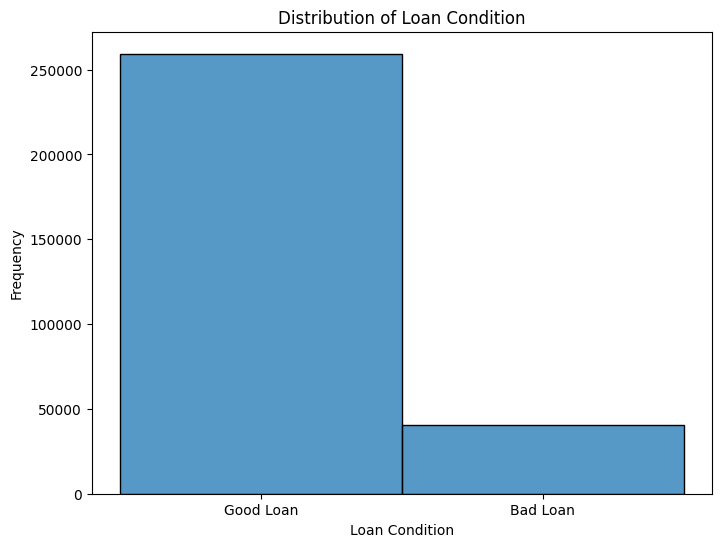

In [29]:
plt.figure(figsize=(8,6))
sns.histplot(df1['loan_condition'])
plt.title('Distribution of Loan Condition')
plt.xlabel('Loan Condition')
plt.ylabel('Frequency')
plt.show()

#### 5.2: Distribution of Total Principal Amount Recieved by Loan Condition

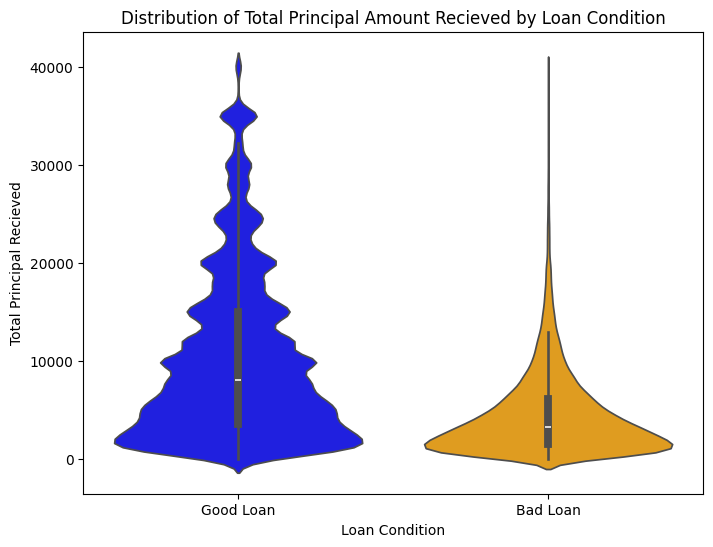

In [31]:
plt.figure(figsize=(8,6))
sns.violinplot(x=df1['loan_condition'],y=df1['total_rec_prncp'],hue = df1['loan_condition'],palette=['blue','orange'])
plt.title('Distribution of Total Principal Amount Recieved by Loan Condition')
plt.xlabel('Loan Condition')
plt.ylabel('Total Principal Recieved')
plt.show()

#### Observation: 
- The plot shows that good loan borrowers pay more recieved amount as compared to bad loan borrowers. 

#### 5.3: Grade vs. Term vs. Loan Amount

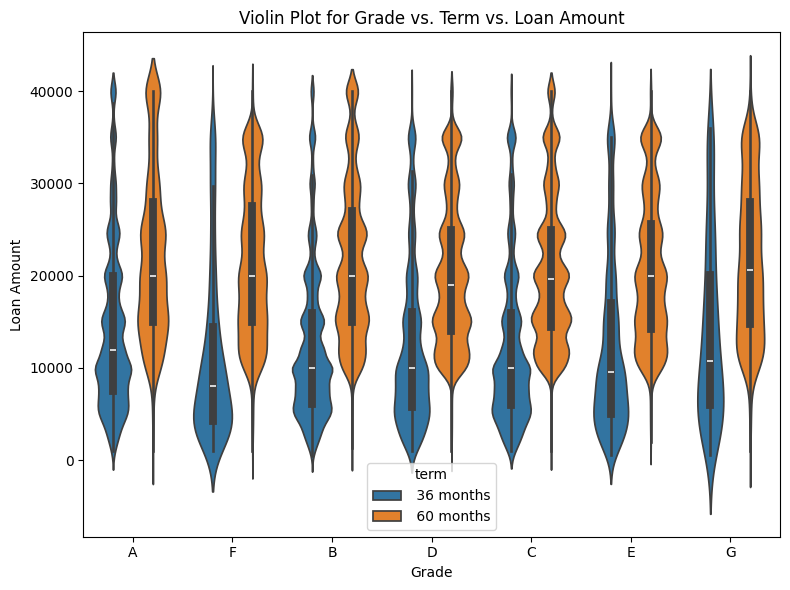

In [32]:
plt.figure(figsize=(8,6))
sns.violinplot(x='grade',y='loan_amnt',hue='term',data=df1,legend=True)
plt.title('Violin Plot for Grade vs. Term vs. Loan Amount')
plt.xlabel('Grade')
plt.ylabel('Loan Amount')
plt.tight_layout()
plt.show()

#### Observation:
- Borrowers having loan term for **60 months** has higher amount of loans as compared to **36 months**.
- Hence, there is visible correlation between term and loan amount.

In [33]:
df1['loan_status'].value_counts().to_frame().reset_index()

,loan_status,count
0,Fully Paid,142637
1,Current,116480
2,Charged Off,36032
3,Late (31-120 days),2832
4,In Grace Period,1098
5,Late (16-30 days),562
6,Does not meet the credit policy. Status:Fully ...,253
7,Does not meet the credit policy. Status:Charge...,102
8,Default,4


#### Observation:
- The loan condition **'Current'** is not clear if it falls under good loans or bad loans.
- Hence, we will remove it from our target variable.

In [35]:
# Copying the dataframe
df2 = df1.copy()

#### 5.3.1: Removing 'Current' status from Loan Condition: 

In [36]:
df2 = df2[~df2['loan_status'].isin(['Current'])]

In [37]:
df2['loan_status'].value_counts().to_frame().reset_index()

,loan_status,count
0,Fully Paid,142637
1,Charged Off,36032
2,Late (31-120 days),2832
3,In Grace Period,1098
4,Late (16-30 days),562
5,Does not meet the credit policy. Status:Fully ...,253
6,Does not meet the credit policy. Status:Charge...,102
7,Default,4


## 6. Missing Values Imputation:

In [59]:
df3 = df2.copy()

#### 6.1: Setting threshold = 60% to filter out high-profile missing values features

In [60]:
df4 = df3.dropna(thresh=int(0.60*len(df3)),axis=1)

#### 6.1.1: Verifying it..

In [61]:
# Verifying Features removal having missing values above threshold at 60%:
print('Missing Values in Percentage is:')
for column in df4.columns:
  percentage_missing=np.mean(df4[column].isna())
  print(f'{column}:{percentage_missing*100:.2f}%')

Missing Values in Percentage is:
id:0.00%
loan_amnt:0.00%
funded_amnt:0.00%
funded_amnt_inv:0.00%
term:0.00%
int_rate:0.00%
installment:0.00%
grade:0.00%
sub_grade:0.00%
emp_title:6.44%
emp_length:5.89%
home_ownership:0.00%
annual_inc:0.00%
verification_status:0.00%
issue_d:0.00%
loan_status:0.00%
pymnt_plan:0.00%
url:0.00%
purpose:0.00%
title:1.24%
zip_code:0.00%
addr_state:0.00%
dti:0.03%
delinq_2yrs:0.00%
earliest_cr_line:0.00%
fico_range_low:0.00%
fico_range_high:0.00%
inq_last_6mths:0.00%
open_acc:0.00%
pub_rec:0.00%
revol_bal:0.00%
revol_util:0.08%
total_acc:0.00%
initial_list_status:0.00%
out_prncp:0.00%
out_prncp_inv:0.00%
total_pymnt:0.00%
total_pymnt_inv:0.00%
total_rec_prncp:0.00%
total_rec_int:0.00%
total_rec_late_fee:0.00%
recoveries:0.00%
collection_recovery_fee:0.00%
last_pymnt_d:0.18%
last_pymnt_amnt:0.00%
last_credit_pull_d:0.00%
last_fico_range_high:0.00%
last_fico_range_low:0.00%
collections_12_mths_ex_med:0.01%
policy_code:0.00%
application_type:0.00%
acc_now_delinq

In [62]:
# Copying Dataframe
df5 = df4.copy()

#### 6.1.2: Removing features that are direct indicators:

In [63]:
cols_to_remove = [
                    'last_pymnt_amnt',
                    'out_prncp',
                    'out_prncp_inv',
                    'recoveries',
                    'total_pymnt',
                    'total_rec_int',
                    'total_rec_late_fee',
                    'total_rec_prncp'
]

# Dropping the above listed columns:
df5.drop(cols_to_remove,axis=1,inplace=True)

#### 6.1.3: Removing Recursive Columns:

In [64]:
recur_cols = ['loan_condition', 'loan_status','emp_length']

# dropping the above listed columns:
df5.drop(recur_cols,axis=1,inplace=True)

#### 6.1.4: Removing irrelevant columns:

In [65]:
df5.drop(['id','emp_title','url','title','zip_code'],axis=1,inplace=True)

#### 6.1.5: Checking Numerical & Categorical features left

In [66]:
# Categorical Columns
cat_cols = df5.select_dtypes(include=['object'])
cat_cols.shape

(183520, 18)

In [67]:
# Numerical Columns
num_cols = df5.select_dtypes(exclude=['object'])
num_cols.shape

(183520, 63)

## 7. Data Distribution

In [53]:
# importing libraries:
from scipy.stats import skew
from scipy.stats import zscore
from scipy import stats

C:\Users\ASAD COMPUTERS\AppData\Local\Temp\ipykernel_16632\806401618.py:11: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = stats.skew(df1[column])


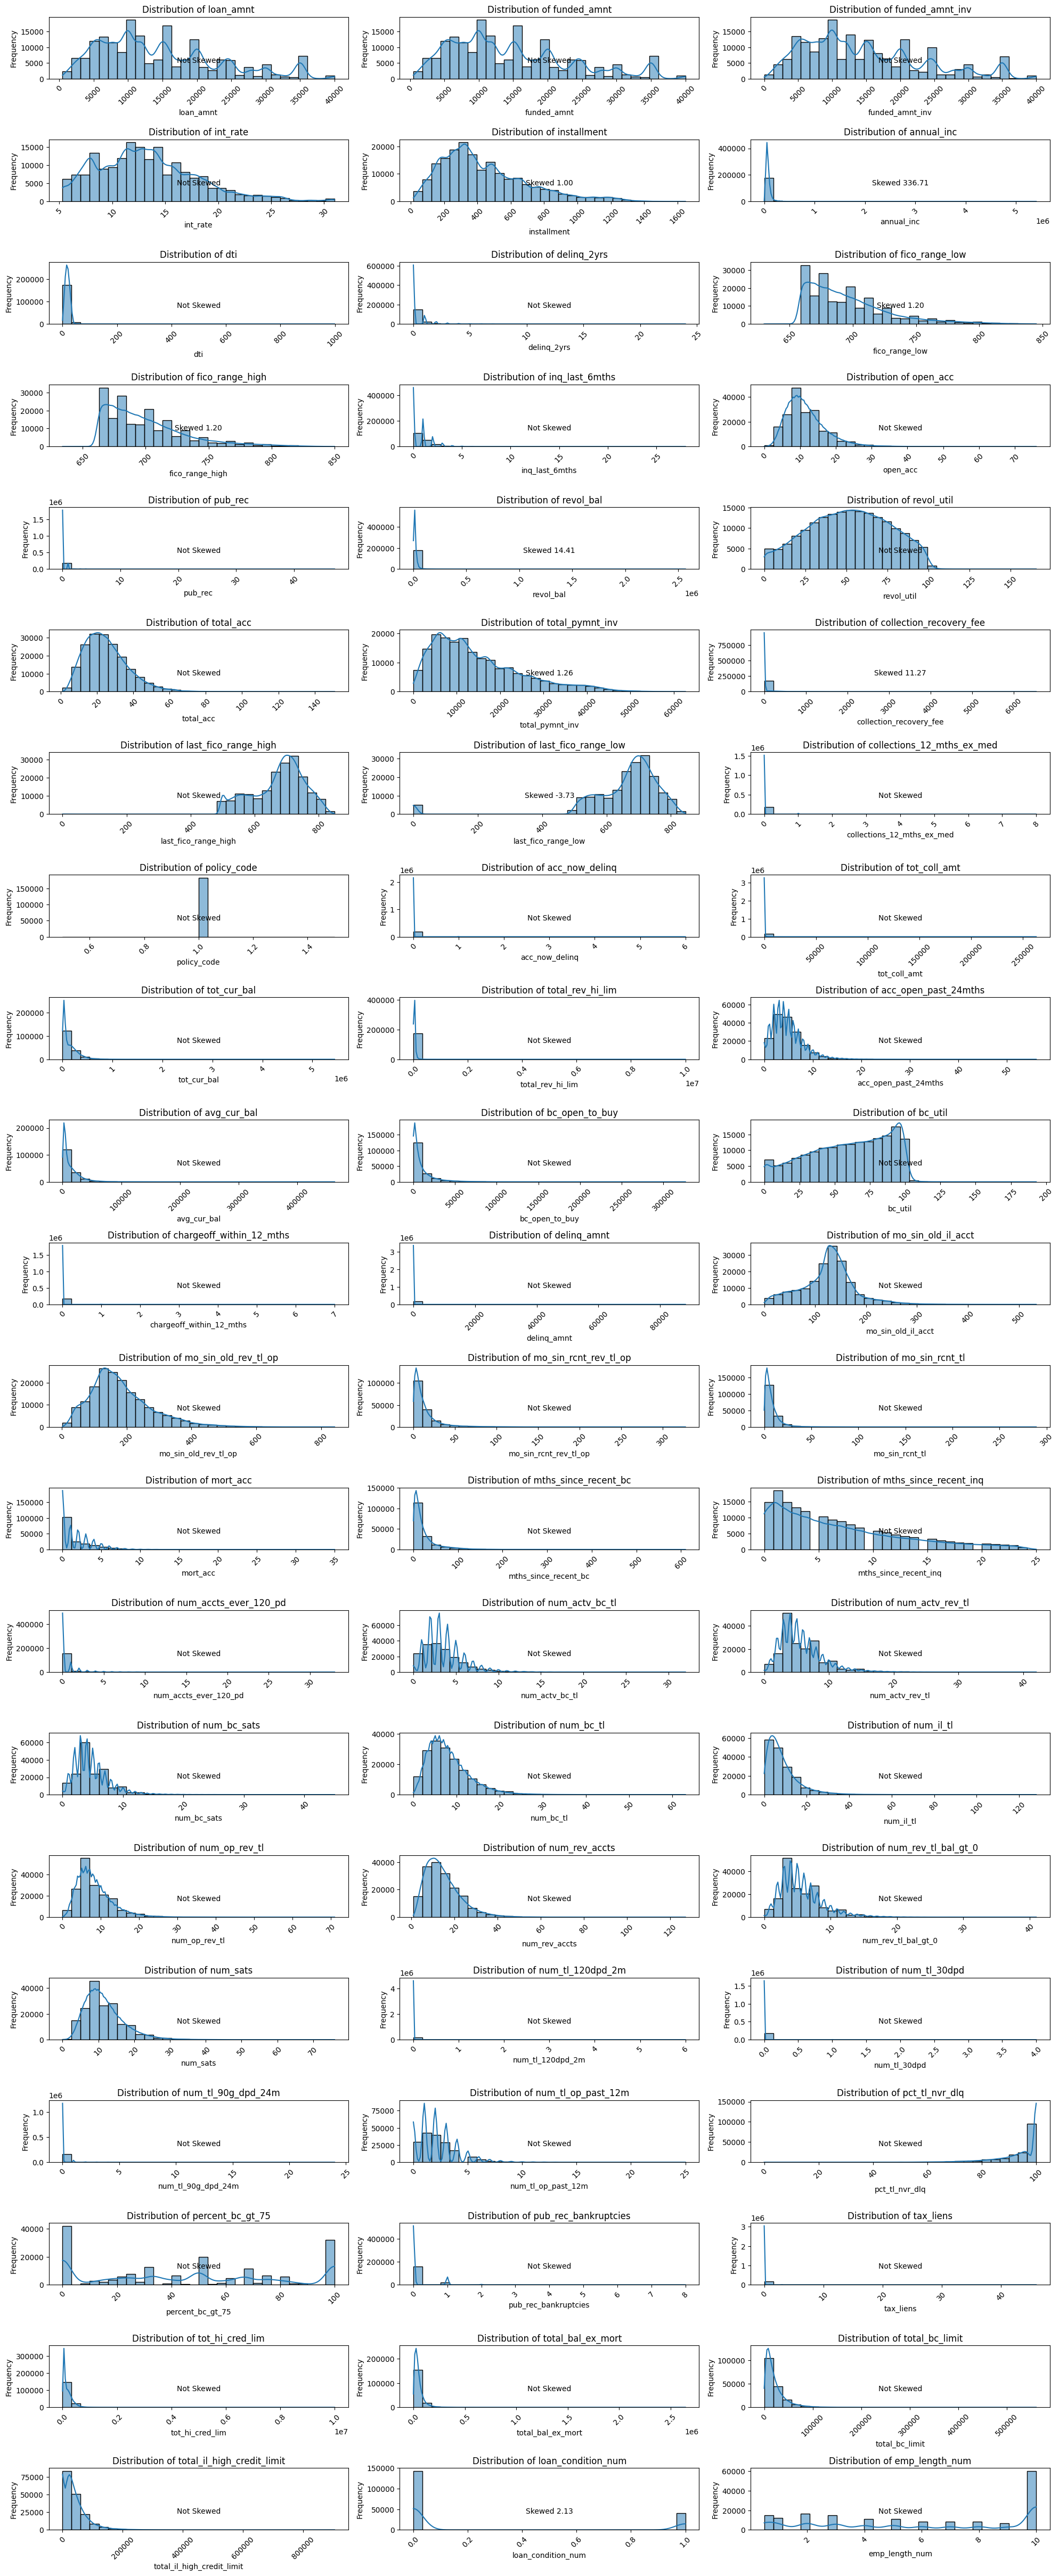

In [68]:
plt.figure(figsize=(20,50))
for i, column in enumerate(num_cols):
    plt.subplot(22,3,i+1)
    sns.histplot(df5[column],bins=30,kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Perfoming stats skewness test:
    skewness = stats.skew(df1[column])
    if skewness > 1 or skewness < -1:
        plt.text(0.5,0.3,f'Skewed {skewness:.2f}',horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
    else:
        plt.text(0.5,0.3,'Not Skewed',horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)

plt.tight_layout()
plt.show()

#### 7.1: Imputing the Missing Values

7.1.1: For Numerical Features

In [69]:
# Copying Dataframe
df6 = df5.copy()

In [70]:
ms_cols = [
    'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment',
    'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
    'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
    'total_pymnt_inv', 'collection_recovery_fee', 'last_fico_range_high',
    'collections_12_mths_ex_med', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
    'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
    'chargeoff_within_12_mths', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op',
    'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
    'mths_since_recent_inq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
    'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts',
    'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd',
    'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75',
    'pub_rec_bankruptcies', 'tax_liens', 'tot_hi_cred_lim', 'total_bal_ex_mort',
    'total_bc_limit', 'total_il_high_credit_limit', 'emp_length_num'
]

In [71]:
# Using for loop to fill missing values with median imputation:
for cols in ms_cols:
   df6[cols] = df6[cols].fillna(df6[cols].median())

7.1.2: For Categorical Features

In [72]:
categorical_cols = ['last_pymnt_d','region']

In [73]:
for col in categorical_cols:
    df6[col] = df6[col].fillna(df6[col].mode()[0])

In [74]:
# Verifying..
df6.isna().sum()

loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
                       ..
disbursement_method     0
debt_settlement_flag    0
loan_condition_num      0
emp_length_num          0
region                  0
Length: 81, dtype: int64

In [75]:
print('Missing Values in Percentage is:')
for column in num_cols:
  percentage_missing=np.mean(df6[column].isna())
  print(f'{column}:{percentage_missing*100:.2f}%')

Missing Values in Percentage is:
loan_amnt:0.00%
funded_amnt:0.00%
funded_amnt_inv:0.00%
int_rate:0.00%
installment:0.00%
annual_inc:0.00%
dti:0.00%
delinq_2yrs:0.00%
fico_range_low:0.00%
fico_range_high:0.00%
inq_last_6mths:0.00%
open_acc:0.00%
pub_rec:0.00%
revol_bal:0.00%
revol_util:0.00%
total_acc:0.00%
total_pymnt_inv:0.00%
collection_recovery_fee:0.00%
last_fico_range_high:0.00%
last_fico_range_low:0.00%
collections_12_mths_ex_med:0.00%
policy_code:0.00%
acc_now_delinq:0.00%
tot_coll_amt:0.00%
tot_cur_bal:0.00%
total_rev_hi_lim:0.00%
acc_open_past_24mths:0.00%
avg_cur_bal:0.00%
bc_open_to_buy:0.00%
bc_util:0.00%
chargeoff_within_12_mths:0.00%
delinq_amnt:0.00%
mo_sin_old_il_acct:0.00%
mo_sin_old_rev_tl_op:0.00%
mo_sin_rcnt_rev_tl_op:0.00%
mo_sin_rcnt_tl:0.00%
mort_acc:0.00%
mths_since_recent_bc:0.00%
mths_since_recent_inq:0.00%
num_accts_ever_120_pd:0.00%
num_actv_bc_tl:0.00%
num_actv_rev_tl:0.00%
num_bc_sats:0.00%
num_bc_tl:0.00%
num_il_tl:0.00%
num_op_rev_tl:0.00%
num_rev_accts

## 8: Checking Outliers:

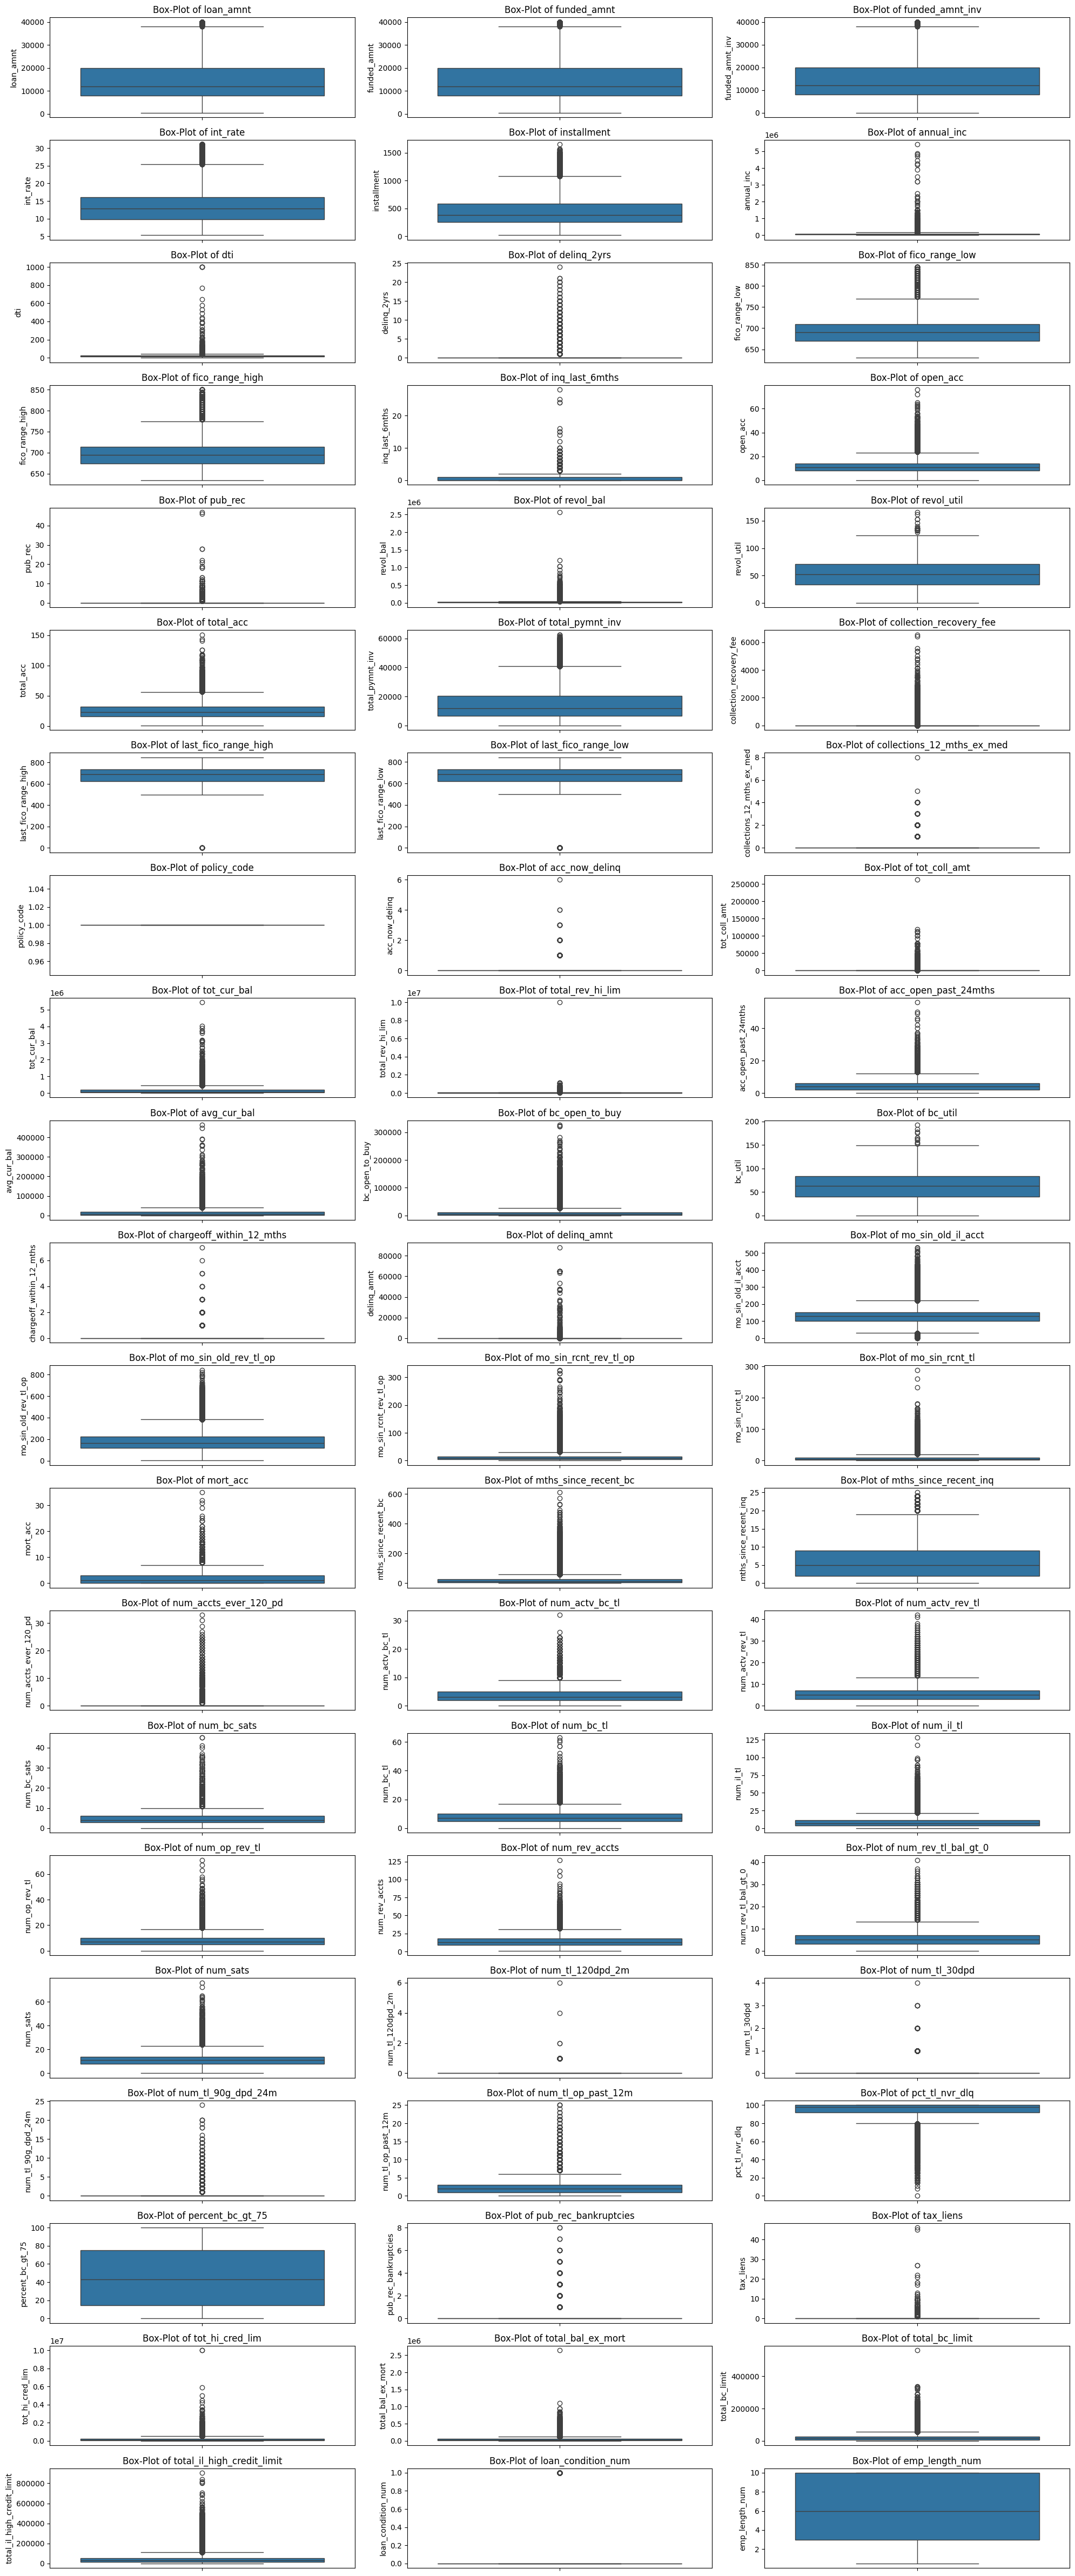

In [76]:
plt.figure(figsize=(20,50))
for i,column in enumerate(num_cols):
    plt.subplot(22,3,i+1)
    sns.boxplot(df6[column])
    plt.title(f'Box-Plot of {column}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### 8.1: Removing Outliers:

In [77]:
numerical_cols = df6.select_dtypes(include=['number'])

In [78]:
# Copying data frame
df7 = df6.copy()

#### 8.1.1: Setting threshold & removing Outliers using Zscore method

In [79]:
# Set threshold = 3 for utlizing zscore method for outliers removal
def remove_outliers(data_columns,threshold=3):
    z_score = zscore(data_columns)
    filtered_data = data_columns[np.abs(z_score)<=threshold]
    return filtered_data

In [80]:
# Usinf for loop to remove Outliers:
for col in numerical_cols:
    df7[col] = remove_outliers(df7[col])

#### 8.1.2: Verifying it..

ValueError: List of boxplot statistics and `positions` values must have same the length

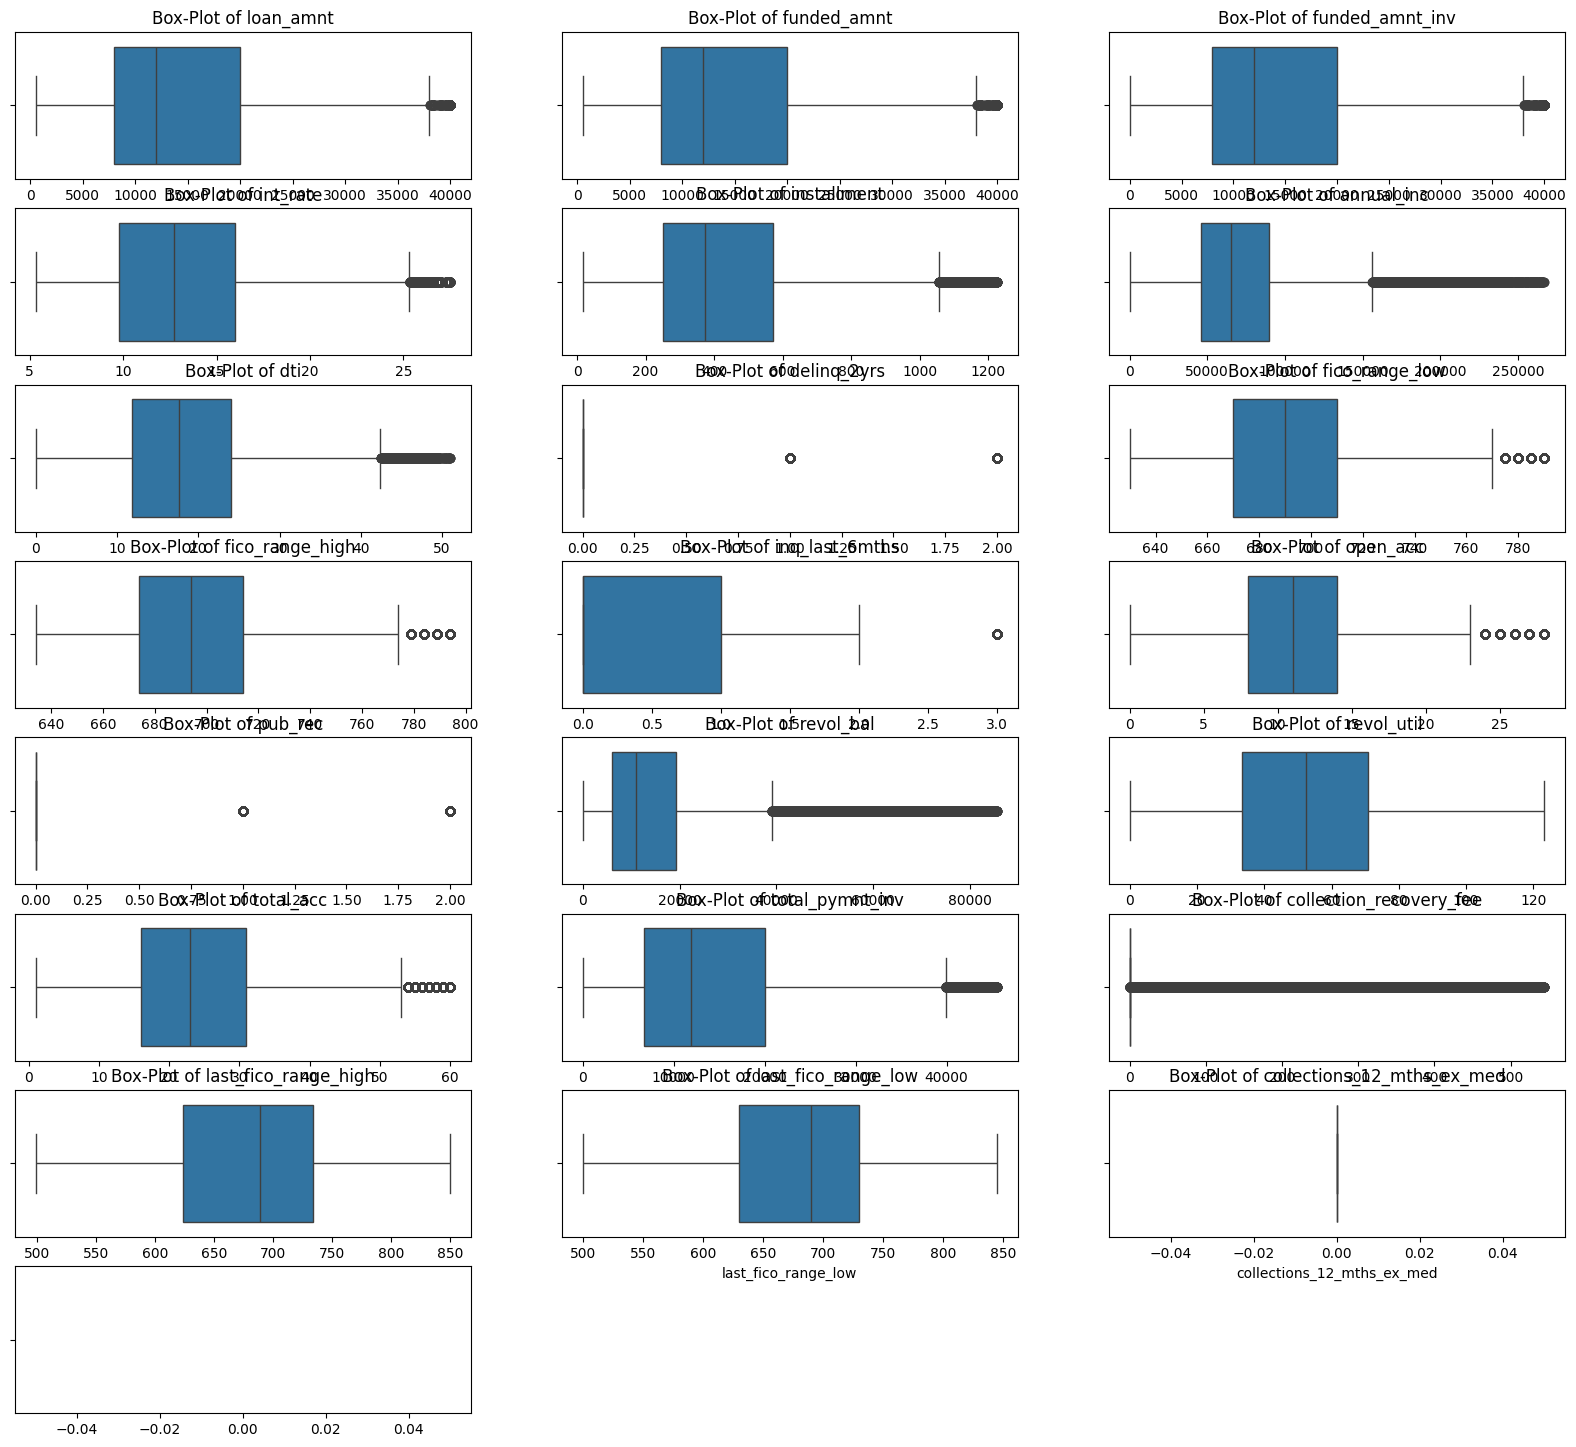

In [86]:
plt.figure(figsize=(20,50))
for i, column in enumerate(numerical_cols):
    plt.subplot(22,3,i+1)
    sns.boxplot(data=df7,x=column)
    plt.title(f'Box-Plot of {column}')
    plt.xlabel(column)  
plt.tight_layout()
plt.show()

#### 8.1.3: Checking Misisng Values and Imputing it:

In [83]:
num_cols = df7.select_dtypes(include='number')
for column in num_cols:
    df7[column] = df7[column].fillna(df7[column].median())

f:\netsol_project\task_1\credit_decisioning_risk_assesment\venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\netsol_project\task_1\credit_decisioning_risk_assesment\venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
f:\netsol_project\task_1\credit_decisioning_risk_assesment\venv\Lib\site-packages\numpy\lib\nanfunctions.py:1215: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [84]:
print('Missing Values in Percentage is:')
for column in num_cols:
    percentage_missing = np.mean(df7[column].isna())
    print(f'{column}:{percentage_missing*100:.2f}%')

Missing Values in Percentage is:
loan_amnt:0.00%
funded_amnt:0.00%
funded_amnt_inv:0.00%
int_rate:0.00%
installment:0.00%
annual_inc:0.00%
dti:0.00%
delinq_2yrs:0.00%
fico_range_low:0.00%
fico_range_high:0.00%
inq_last_6mths:0.00%
open_acc:0.00%
pub_rec:0.00%
revol_bal:0.00%
revol_util:0.00%
total_acc:0.00%
total_pymnt_inv:0.00%
collection_recovery_fee:0.00%
last_fico_range_high:0.00%
last_fico_range_low:0.00%
collections_12_mths_ex_med:0.00%
policy_code:100.00%
acc_now_delinq:100.00%
tot_coll_amt:0.00%
tot_cur_bal:0.00%
total_rev_hi_lim:0.00%
acc_open_past_24mths:0.00%
avg_cur_bal:0.00%
bc_open_to_buy:0.00%
bc_util:0.00%
chargeoff_within_12_mths:0.00%
delinq_amnt:100.00%
mo_sin_old_il_acct:0.00%
mo_sin_old_rev_tl_op:0.00%
mo_sin_rcnt_rev_tl_op:0.00%
mo_sin_rcnt_tl:0.00%
mort_acc:0.00%
mths_since_recent_bc:0.00%
mths_since_recent_inq:0.00%
num_accts_ever_120_pd:0.00%
num_actv_bc_tl:0.00%
num_actv_rev_tl:0.00%
num_bc_sats:0.00%
num_bc_tl:0.00%
num_il_tl:0.00%
num_op_rev_tl:0.00%
num_rev

## 9: Correlation Analysis:
- We will perform **Correlation analysis** to better understand the correlation of independent variables. It will play critical role in **Feature Selection** process.

**Feature Selection** is categorized into following:
- **Supervised Feature Selection:** It uses target variable (i.e., removing redundant variables).
- **Unsupervised Feature Selection:** It doesn't use target variable (i.e., Correlation)

**In this project:**
- We will use **Unsupervised Feature Selection** and determine best features for higher Model efficiency.

In [87]:
# Copying dataframe
df8 = df7.copy()

In [88]:
# importing library
from sklearn.preprocessing import LabelEncoder

In [89]:
labelencoder = LabelEncoder()
# using for loop:
for col in cat_cols:
    df8[col] = labelencoder.fit_transform(df7[col])

**Observation:**
- We have used **Label Encoding** to transform categorical columns into labels for correlation analysis with target variable to further scale down feature selection process.

#### 9.1: Correlation Analysis:

**9.1.1: Storing target variable:**

In [90]:
target_variable = 'loan_condition_num'

**9.1.2: Taking correlation of independent variables with target_variable:**

In [91]:
correlation = df8.corr()[target_variable]

**9.1.3: Sorting correlation w.r.t target variable**

In [92]:
sorted_correlation = correlation.drop(target_variable).sort_values(ascending=False)

**9.1.4: Plotting Bar Plot to show Feature's Correlation**

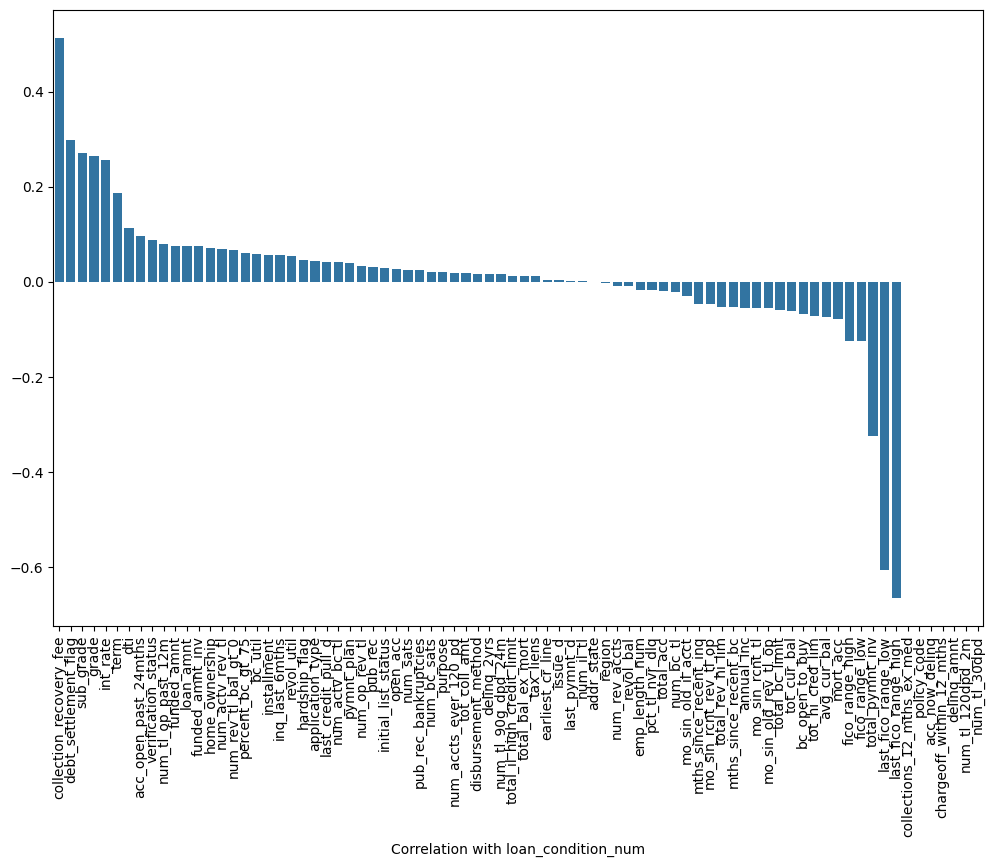

loan_amnt               0.075558
funded_amnt             0.075641
funded_amnt_inv         0.075311
term                    0.185811
int_rate                0.255636
                          ...   
disbursement_method     0.017575
debt_settlement_flag    0.298492
loan_condition_num      1.000000
emp_length_num         -0.016048
region                 -0.002113
Name: loan_condition_num, Length: 81, dtype: float64


In [93]:
plt.figure(figsize=(12,8))
sns.barplot(x=sorted_correlation.index,y=sorted_correlation.values,orient='v')
plt.xlabel('Correlation with {}'.format(target_variable))
plt.xticks(rotation=90)
plt.show()
print(correlation)

**9.1.5: Determining Top Correlated Features:** 

In [94]:
top_variables = sorted_correlation.abs().nlargest(10).index.tolist()

In [95]:
correlation_matrix = df8[top_variables].corr()

In [96]:
mask = np.tril(np.ones_like(correlation_matrix,dtype=bool))

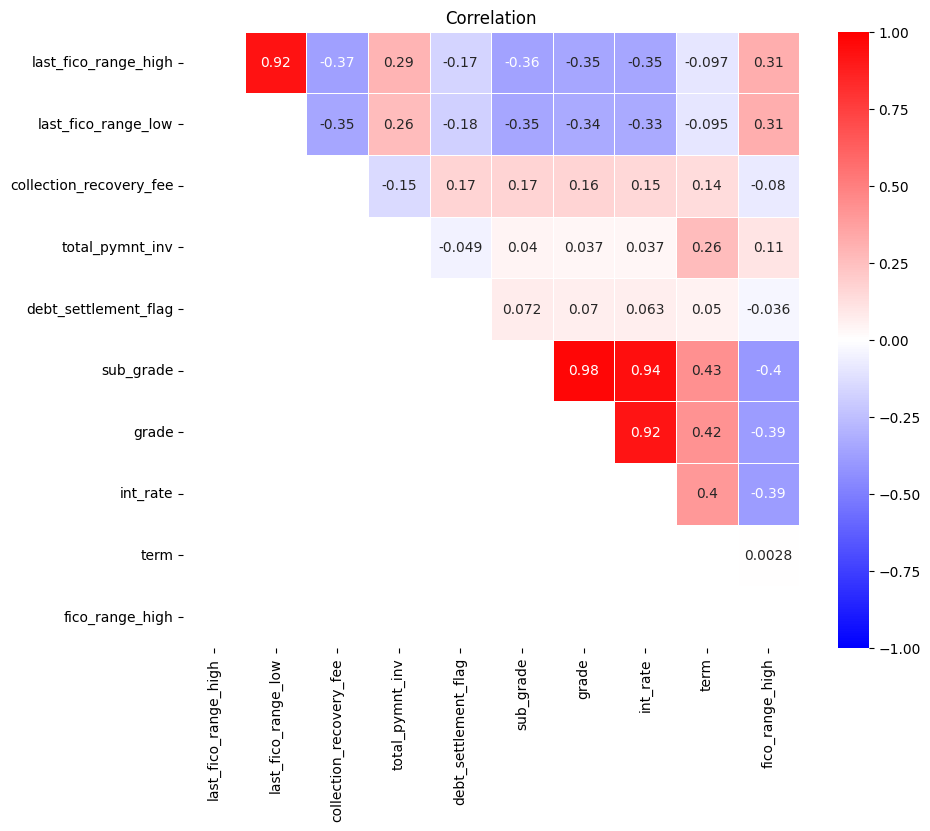

In [97]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='bwr',vmin=-1,vmax=1,square=True,linewidth=0.5,mask=mask)
plt.title('Correlation')
plt.show()

**9.1.6: Storing Highly Correlated Features:**

In [98]:
df9 = df7[['last_fico_range_high', 'last_fico_range_low',
       'collection_recovery_fee', 'total_pymnt_inv', 'debt_settlement_flag',
       'sub_grade', 'int_rate', 'grade', 'term', 'fico_range_high','loan_condition_num']]

In [99]:
df9.dtypes

last_fico_range_high       float64
last_fico_range_low        float64
collection_recovery_fee    float64
total_pymnt_inv            float64
debt_settlement_flag        object
sub_grade                   object
int_rate                   float64
grade                       object
term                        object
fico_range_high            float64
loan_condition_num           int32
dtype: object

In [100]:
num_cols = df9.select_dtypes(include=['number'])
cat_cols = df9.select_dtypes(include=['object'])

**9.1.7: Checking Distribution:**

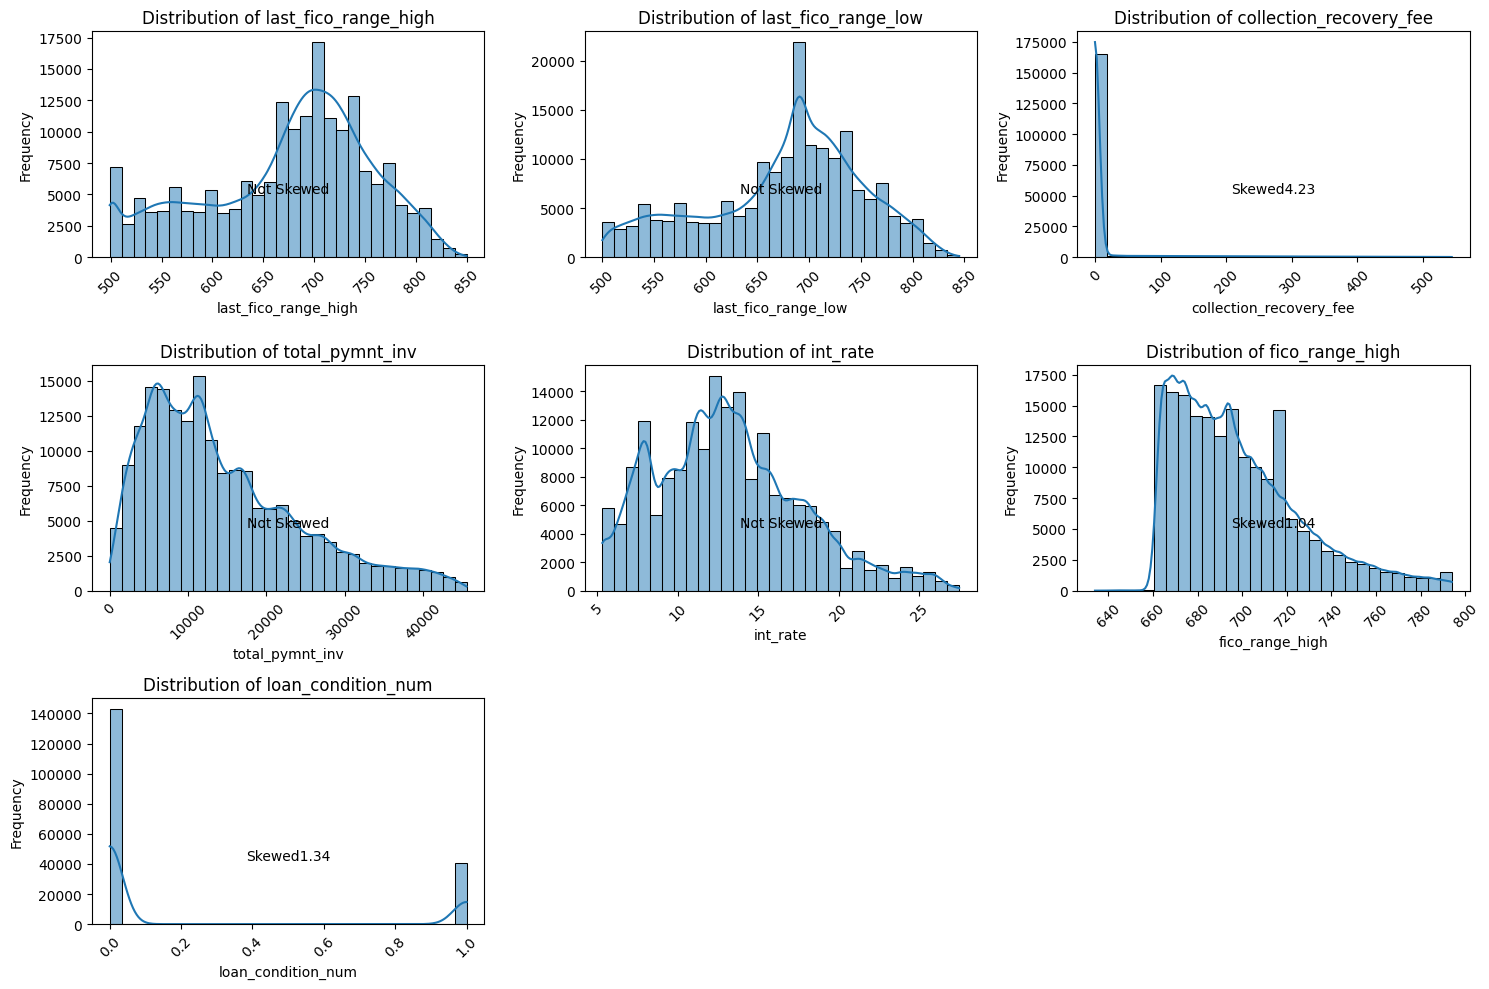

In [101]:
plt.figure(figsize=(15,10))
for i, column in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df9[column],bins=30,kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    skewness = stats.skew(df9[column])
    if skewness > 1 or skewness <-1:
        plt.text(0.5,0.3,f'Skewed{skewness:.2f}',horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
    else:
        plt.text(0.5,0.3,'Not Skewed',horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

#### Observation:
- The skewed columns are <b>collection_recovery_fee</b> and <b>fico_range_high</b> at <b>4.23</b> and <b>1.04</b>

### 9.2: Using binning techniques to remove skewness:
- We will use **Quantile-based** binning techniques.

In [102]:
df10 = df9.copy()

In [103]:
num_bins = 91
df10['collection_recovery_fee'] = pd.qcut(df10['collection_recovery_fee'],num_bins,labels=False,duplicates='drop')

In [104]:
num_bins = 92
df10['fico_range_high'] = pd.qcut(df10['fico_range_high'],num_bins,labels=False,duplicates='drop')

In [105]:
df10.shape

(183520, 11)

**Plotting the Binned Distribution:**

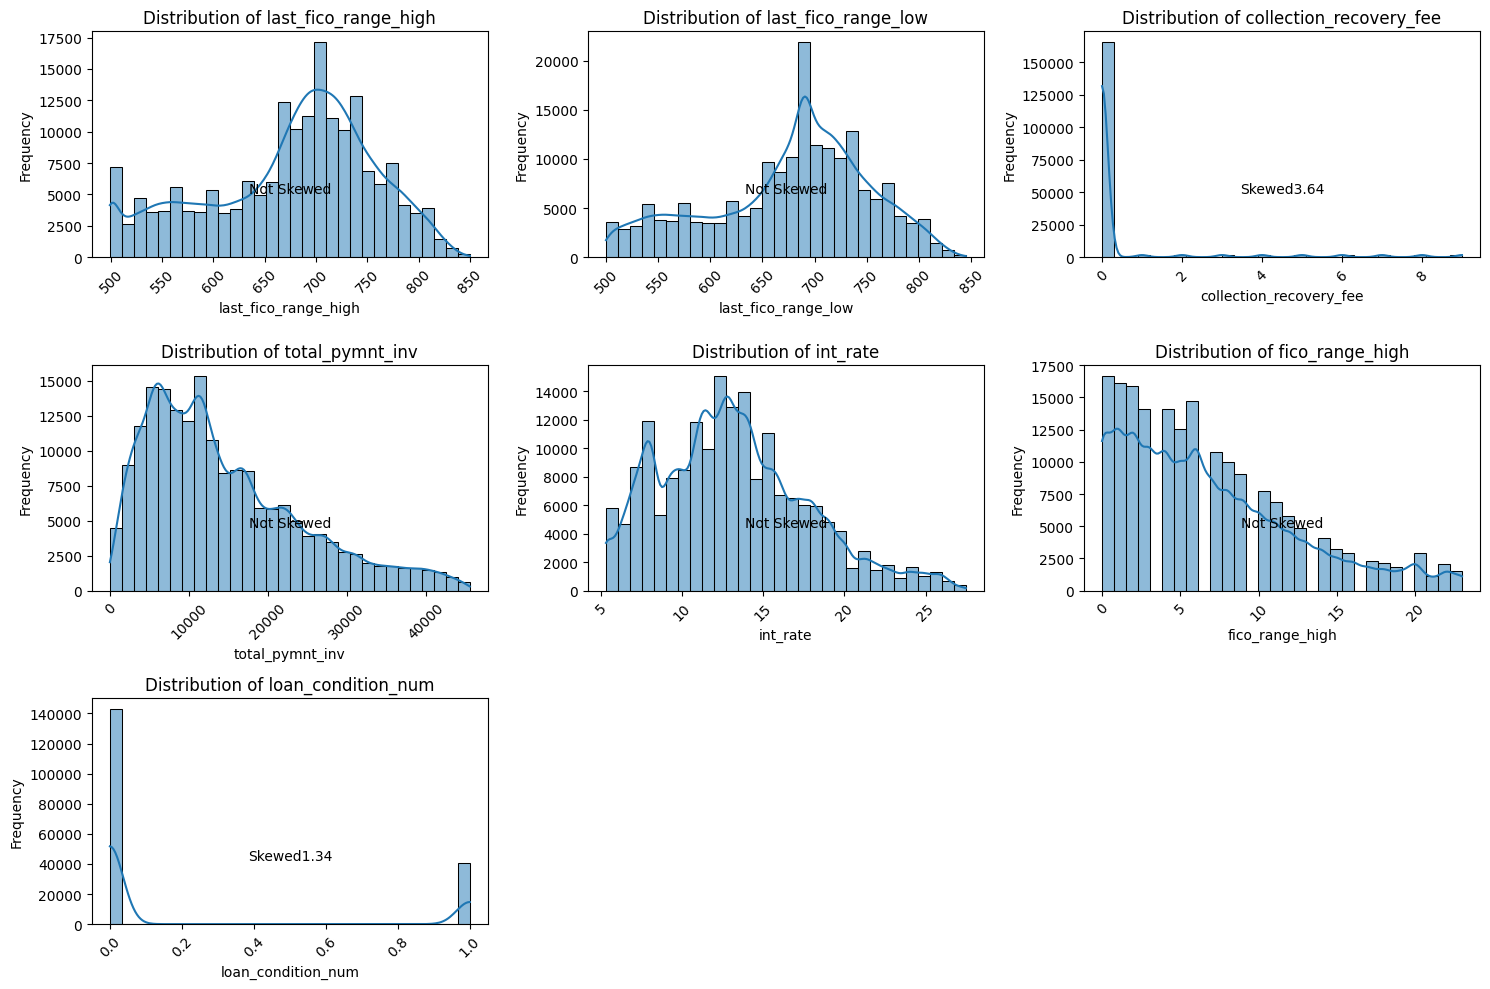

In [106]:
plt.figure(figsize=(15,10))
for i, column in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df10[column],bins=30,kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    skewness = stats.skew(df10[column])
    if skewness > 1 or skewness <-1:
        plt.text(0.5,0.3,f'Skewed{skewness:.2f}',horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
    else:
        plt.text(0.5,0.3,'Not Skewed',horizontalalignment='center',verticalalignment='center',transform=plt.gca().transAxes)
plt.tight_layout()
plt.show()

### 9.3: Applying Standardization/Scaling techniques on Numerical Features
- I will use StandardScaler.

In [110]:
from sklearn.preprocessing import StandardScaler
standardscaler = StandardScaler()

In [108]:
cols = df10[['last_fico_range_high', 'last_fico_range_low',
            'collection_recovery_fee','total_pymnt_inv',
            'int_rate','fico_range_high'
            ]]

In [111]:
for column in cols:
    df10[column] = standardscaler.fit_transform(df10[[column]])

**9.3.1: Plotting Standard Distribution:**

In [112]:
num_cols=df10.select_dtypes(include=['number'])

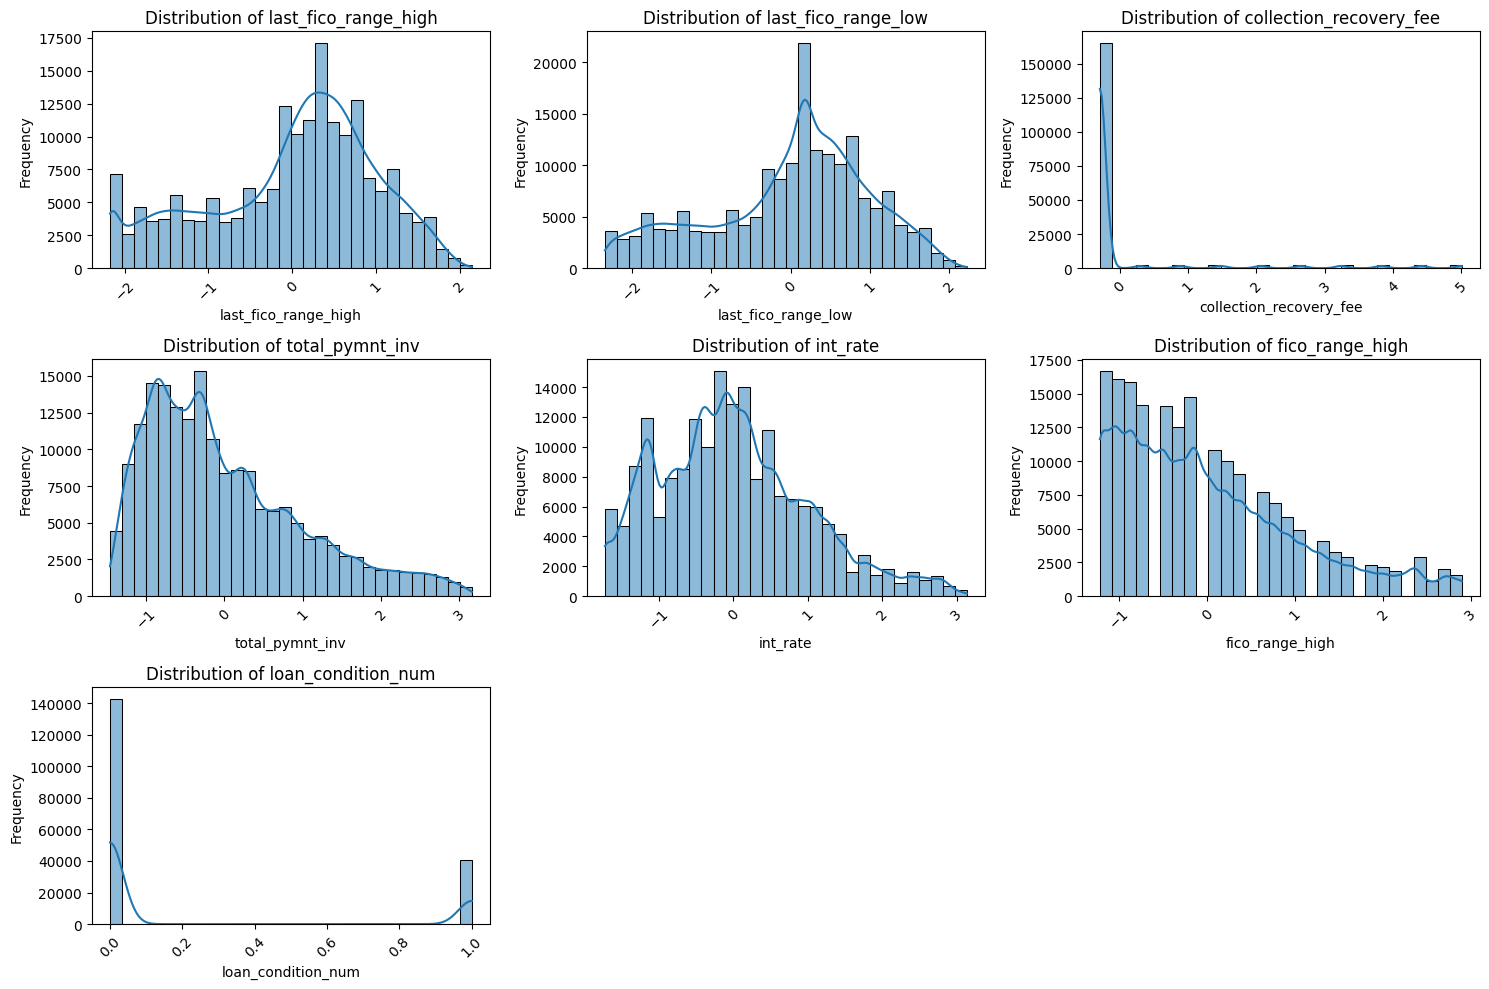

In [113]:
plt.figure(figsize=(15,10))
for i, column in enumerate(num_cols):
    plt.subplot(3,3,i+1)
    sns.histplot(df10[column],bins=30,kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [114]:
df10.to_csv('preprocessed_data.csv',index=True)